<a href="https://colab.research.google.com/github/GiselleNidhoggr/StatisticalInference/blob/main/Semana_1_Aula_3-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 1 - Aula 3 | Modelagem e Inferência Estatística – PES310

# Exercício 1

A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos carros disponíveis que apresente algumas informações importantes para treinar os novos vendedores. 
A base de dados foi criada em um documento de texto e contem as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir 100 m: cemm. 

Analise os dados dos 15 carros com motor aspirado que a "GT Auto" tem em estoque para venda, e crie alguns gráficos que simplifiquem as informações úteis para ajudar os novos vendedores a entender melhor as características dos carros. Seguen algumas sugestões:

a. Realizar um diagrama de ramo e folha para observar as variáveis.

b. Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e o consumo de combustível.

c. Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e potência.

d. Realize um diagrama de dispersão para verificar a correlação entre o peso e o tempo 0-100.

Explique para a "GT Auto" como deve usar essas informações nos treinamentos.

In [39]:
#@title Importar a base de dados
#upload cars_vertical.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving cars_vertical.txt to cars_vertical (1).txt


In [40]:
#Verificar se os dados foram importados
print (uploaded['cars_vertical.txt'][:200].decode('utf-8') + '...') #de nada ate 200 caracteres

﻿brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
Gurgel BR800 0.8 1991,792,12,33,650,34.4,2,0
FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
Hyundai HB20 Sense 2020,1000,12.8,80,9...


In [41]:
#Observar os dados
import io #Python io module allows us to manage the file-related input and output operations. 
#The advantage of using the IO module is that the classes and functions available allows us to extend the functionality 
#to enable writing to the Unicode data. journaldev.com
import pandas as pd #jà importamos lá em cima
df = pd.read_csv(io.StringIO(uploaded['cars_vertical.txt'].decode('utf-8')))
df.head(14) #nao tem mais de 14 entradas


,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [42]:
#Exibindo informações gerais sobre o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand/model/year  14 non-null     object 
 1   cap_vol           14 non-null     int64  
 2   consumo           14 non-null     float64
 3   power             14 non-null     int64  
 4   weight            14 non-null     int64  
 5   cemm              14 non-null     float64
 6   nu_cy             14 non-null     int64  
 7   Etype             14 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ KB


In [43]:
# Computa estatísticas de atributos numéricos
df.describe()

,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,2867.785714,8.357143,218.000000,1294.714286,11.007143,5.357143,0.0
std,2066.127935,2.848944,168.564984,348.445654,7.917893,2.590133,0.0
min,792.000000,3.000000,33.000000,650.000000,3.600000,2.000000,0.0
25%,1425.500000,6.525000,90.500000,1012.750000,6.175000,4.000000,0.0
50%,1998.000000,8.850000,151.500000,1320.500000,10.000000,4.000000,0.0
75%,3422.750000,10.375000,296.750000,1572.500000,12.100000,6.000000,0.0
max,7291.000000,12.800000,602.000000,1760.000000,34.400000,12.000000,0.0


In [44]:
#@title Tratamento de dados,para nomear os dados em uma variável
c1=df["cap_vol"]
c2=df["consumo"]
c3=df["power"]
c4=df["weight"]
c5=df["cemm"]
c6=df["nu_cy"]

## Resposta a)
Realizar um diagrama de ramo e folha para observar as variáveis.

In [45]:
# instalar libraria para diagrama de ramo e folha
!pip3 install -U stemgraphic

(<Figure size 750x250 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f54aab2ae50>)

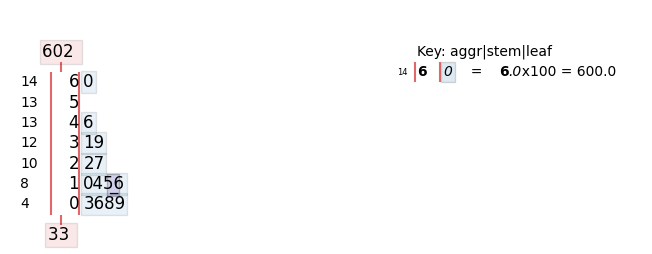

In [46]:
# importar libraria para realizar diagrama de ramo e folha (stem-leaf)
import stemgraphic

#A streamgraph is a variation of the stacked area graph. It displays the evolution of a numeric value for several groups.
#Each group is displayed around a central axis and edges are rounded resulting in a flowing and organic shape

# Observar todas as variáveis e escolher as adequadas
# c1, scale=1000 --> Capacidade volumétrica ou cilindrada
# c2, scale=1    --> Consumo	
# c3, scale=100  --> Potência
# c4, scale=100  --> Peso
# c5, scale=10   --> 0-100
stemgraphic.stem_graphic(c3, scale = 100)


Variáveis que podem ser observadas:
*   List item
*   List item

Variáveis que não podem ser observadas:
*   List item
*   List item


## Resposta b)
Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e o consumo de combustível.

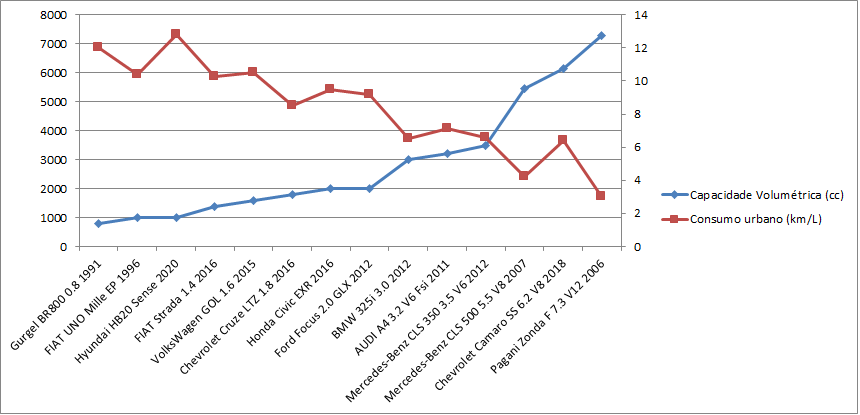

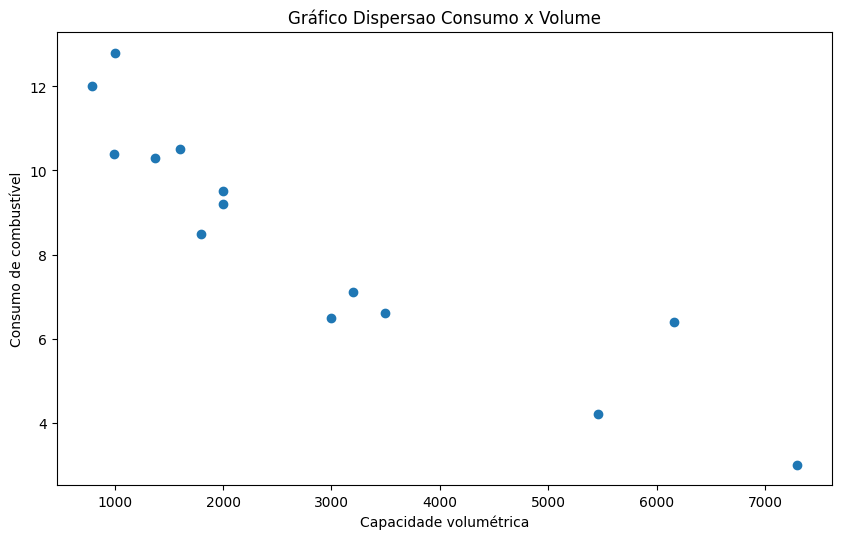

In [47]:
#fiz sozinha :)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = c1, y = c2)
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível')
plt.title('Gráfico Dispersao Consumo x Volume')

plt.show()

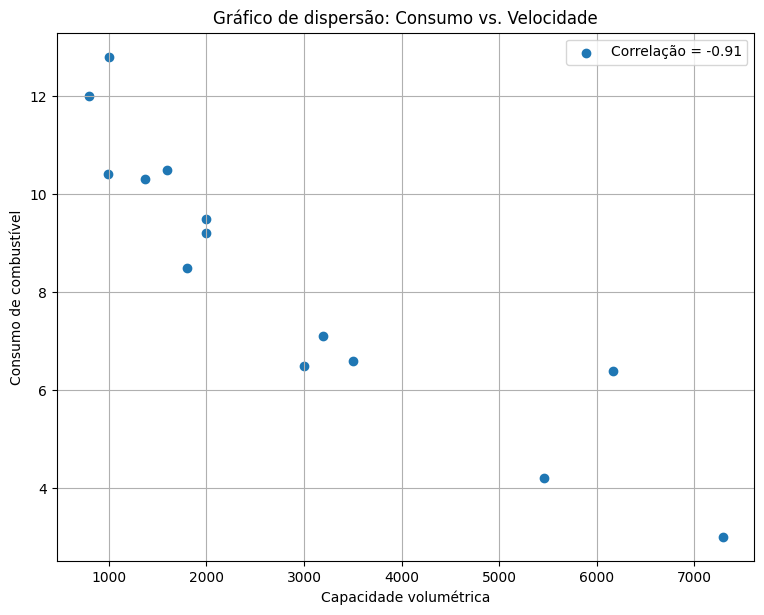

In [48]:
 #Consumo vs. Velocidade --> c1,c2
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c1, c2, label=f'Correlação = {np.round(np.corrcoef(c1,c2)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível') 
plt.title('Gráfico de dispersão: Consumo vs. Velocidade')
plt.legend()
plt.grid(True)
plt.show()

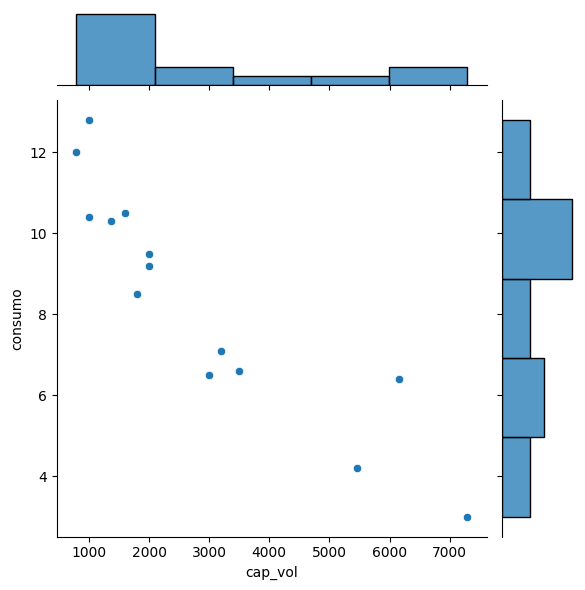

In [49]:
sns.jointplot(x=c1,y=c2); #sem o ; mostra o alocamento do elemento

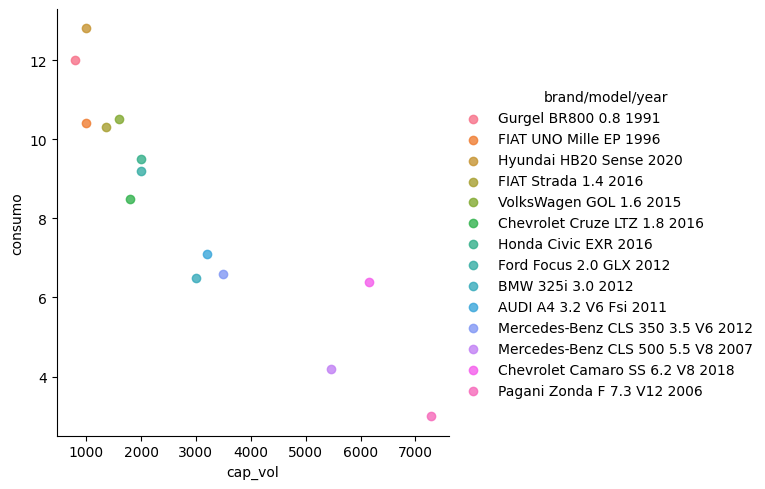

In [50]:
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100}) # rcdefaults() to restore the default rcParams after changes
#rcParams.update() does not support abbreviations or grouping
sns.lmplot(x='cap_vol', y='consumo',hue='brand/model/year', data=df1);

## Resposta c)
Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e potência.

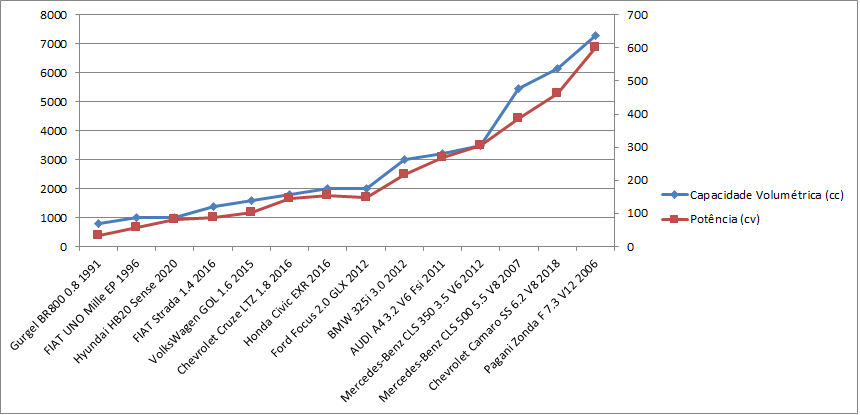

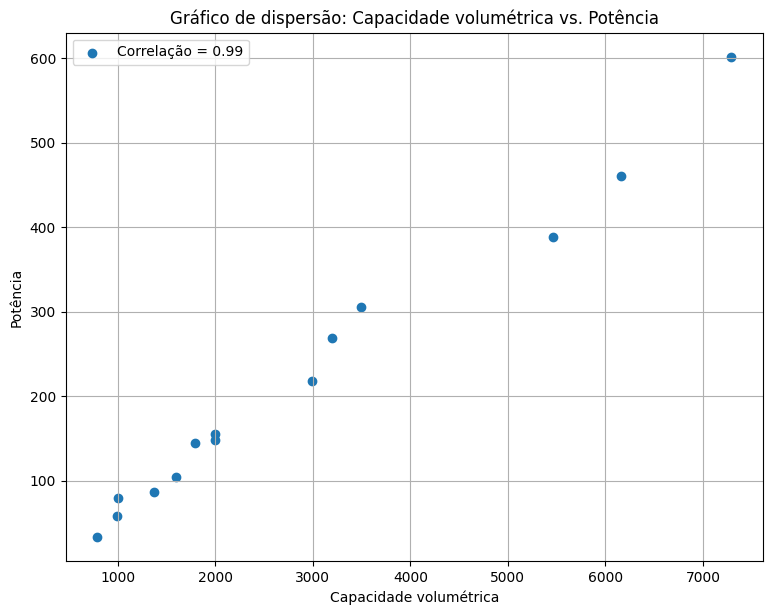

In [51]:
# Capacidade volumétrica vs. Potência --> c1,c3 
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c1,c3, label=f'Correlação = {np.round(np.corrcoef(c1,c3)[0,1], 2)}')
plt.xlabel('Capacidade volumétrica')
plt.ylabel('Potência') 
plt.title('Gráfico de dispersão: Capacidade volumétrica vs. Potência')
plt.legend()
plt.grid(True)
plt.show()

## Resposta d)
Realize um diagrama de dispersão para verificar a correlação entre o peso e o tempo 0-100.
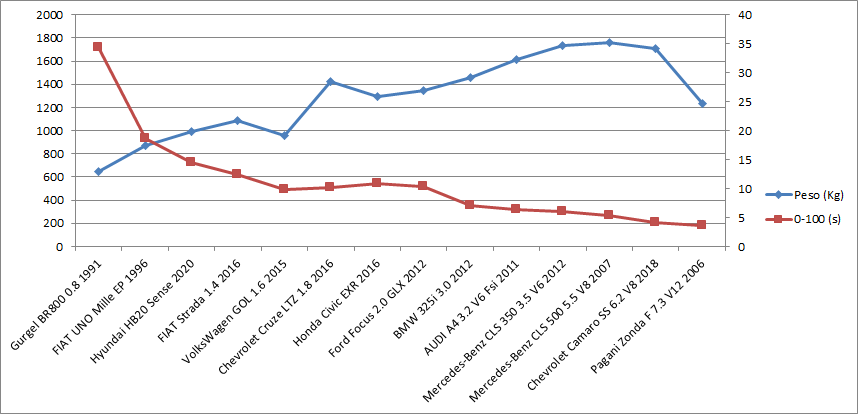

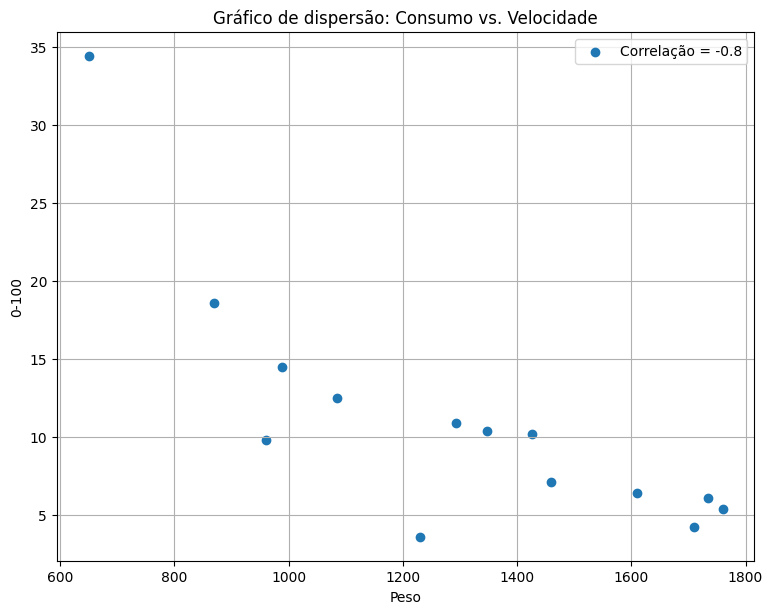

In [52]:
 #Consumo vs. Velocidade --> c4,c5,
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c4,c5, label=f'Correlação = {np.round(np.corrcoef(c4,c5)[0,1], 2)}')
plt.xlabel('Peso')
plt.ylabel('0-100') 
plt.title('Gráfico de dispersão: Consumo vs. Velocidade')
plt.legend()
plt.grid(True)
plt.show()

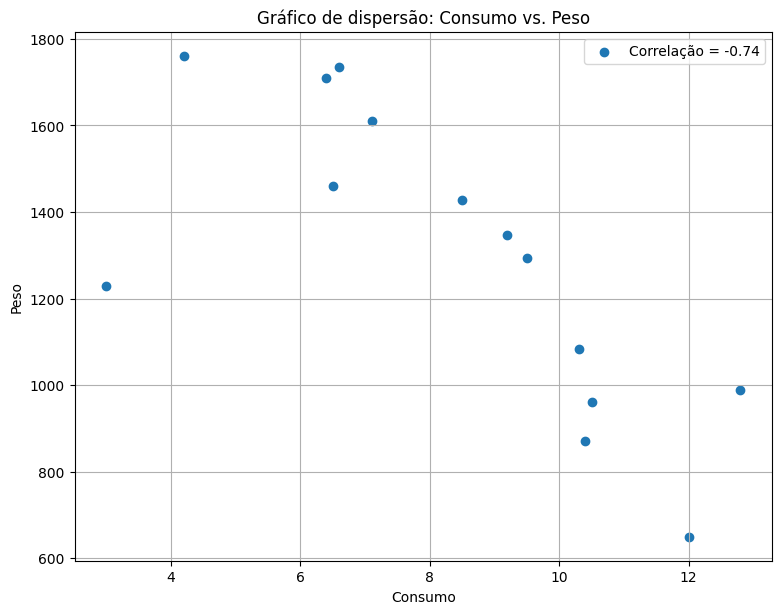

In [53]:
#@title Observações 1
#Outros dados: Consumo vs. Peso--> c2,c4,
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
plt.scatter(c2,c4, label=f'Correlação = {np.round(np.corrcoef(c2,c4)[0,1], 2)}')
plt.xlabel('Consumo')
plt.ylabel('Peso') 
plt.title('Gráfico de dispersão: Consumo vs. Peso')
plt.legend()
plt.grid(True)
plt.show()

* Adotar criterios de classificação dos dados

In [54]:
#@title Observações 2 
#upload cars_vertical2.txt
#importar nova base de dados reclassificada
from google.colab import files
uploaded = files.upload()

Saving cars_vertical2.txt to cars_vertical2 (1).txt


In [55]:
# Definir um data frame ao invés de tratar as variáveis uma a uma
df2 = pd.read_csv(io.StringIO(uploaded['cars_vertical2.txt'].decode('utf-8')))
df2 = pd.DataFrame(data=df2)
df2

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


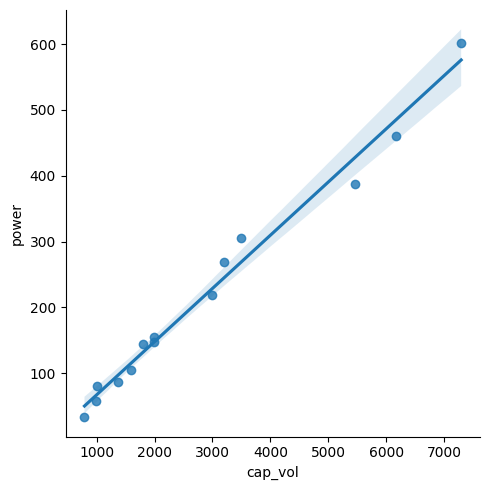

In [56]:
#@title Observações 3 
#OBservar dados ao redor da reta, análise previa correlação = 0,91
sns.lmplot(x='cap_vol', y='power', data=df2);

In [ ]:
# Observações 4
dfa=df[df2['classi']==0]
dfb=df[df2['classi']==1]
dfc=df[df2['classi']==2]
# Plot 
# dfa['var_x'],dfa['var_y']
plt.scatter(dfa['consumo'],dfa['weight'],color='blue', marker= '*', label='classif0')
plt.scatter(dfb['consumo'],dfb['weight'],color= 'red', marker='v', label='classif1')
plt.scatter(dfc['consumo'],dfc['weight'],color= 'green', marker='.', label='classif2')
plt.legend()


In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='consumo', y='weight', hue='classi', data=df2);

# Exercício 2
O artigo "Alguma experiência de campo no uso de um método acelerado na estimativa da resistência do concreto em 28 dias" (*Some field experience in the use of an accelerated method in estimating 28-day strength of concrete*, J. of Amer. Concrete Institute, 1969: 895) fez a regressão de y = resistência do concreto usando tratamento padrão de 28 dias (1 psi = 7 KPa) em relação a x = resistência do concreto usando tratamento acelerado (psi).

Suponha que a equação da reta de regressão verdadeira seja $y = 1800 + 1,3 x$. 

a. Qual é o valor esperado da resistência aos 28 dias quando a resistência usando o tratamento acelerado é igual a 2500? 

b. Até que ponto podemos esperar que a resistência aos 28 dias mude quando a resistência usando tratamento acelerado aumenta em 1 psi vezes?

c. Responda ao item (b) para um aumento de 100 psi. 

d. Responda ao item (b) para uma diminuição de 100 psi.   
 

## Resposta a) 
Qual é o valor esperado da resistência aos 28 dias quando a resistência usando o tratamento acelerado é igual a 2500?

Como $Y = \beta_0 + \beta_1 x_i$ 

e $y = 1800 + 1,3 x$. Lembrando que:

y = resistência do concreto usando tratamento padrão de 28 dias. 

x = resistência do concreto usando tratamento acelerado [psi] ou [libra-força por polegada quadrada].

$\beta_0= 1800$ e $\beta_1= 1,3$ 

O valor esperado de $Y$ 

$\mu_{Y:x^*}  = \beta_0 + \beta_1 x_i$

Substituindo com os dados indicados no item a, isto é $x=2500$

$\mu_{Y:2500} = 1800 + 1,3(2500)$.



In [59]:
uy= 1800 + 1.3*2500 #equaçao de regressao simples, com x=2500   - y=1800+1,3x
uy
print('O valor esperado de Y para x=2500 é =',uy)

O valor esperado de Y para x=2500 é = 5050.0


## Resposta b)
Até que ponto podemos esperar que a resistência aos 28 dias mude quando a resistência usando tratamento acelerado aumenta em 1 psi vezes?

$y = 1800 + 1,3 x$.

$\beta_0= 1800$ intercepto

e $\beta_1= 1,3$ inclinação

Mudança na variação é definida pela inclinação da reta ou seja $\beta_1$

O valor esperado de $Y$ será $\beta_1 \times 1$

$\beta_1 = 1,3$

In [67]:
uy2= 1.3*1 #se utiliza apenas a inclinaçao, com psi x=1   - y=1,3x
uy2
print('O valor esperado é =',uy2)

O valor esperado é = 1.3


## Resposta c)
Responda ao item (b) para um aumento de 100 psi.

O valor esperado de $Y$ será $\beta_1 \times 100 $

$\beta_1 = 130$

Assim a nova reta será 
$y = 1800 + 130 x$.

In [66]:
uy3= 1.3*100 #se utiliza apenas a inclinaçao, com psi x=100   - y=1,3x
uy3
print('O valor esperado é =',uy3)

O valor esperado é = 130.0


## Resposta d)
Responda ao item (b) para uma diminuição  de 100 psi.

O valor esperado de $Y$ será $\beta_1 \times 100 $ mas com inclinação negativa

$\beta_1 = - 130$

Assim a nova reta será 
$y = 1800 - 130 x$.

In [68]:
uy4= 1.3*(-100) #se utiliza apenas a inclinaçao, com psi x=(-100)   - y=1,3x
uy4
print('O valor esperado é =',uy4)

O valor esperado é = -130.0


# Exercício 3
Em relação ao exercício anterior, suponha que o desvio padrão do desvio aleatório e seja 350 psi (1 psi = 7 KPa). 

a. Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando trata-mento acelerado for 2.000? 

b. Repita o item (a), substituindo 2.000 por 2.500. 

c. Considere fazer duas observações independentes sobre a resistência aos 28 dias, a primeira para uma resistência usando tratamento acelerado de 2.000 e a segunda para x = 2.500. Qual é a probabilidade de que a segunda observação exceda a primeira em mais de 1.000 psi? 

d. Sejam Y1 e Y2 as observações sobre a resistência aos 28 dias quando x = x1 e x = x2, respectivamente. Em quanto x2 excederia x1 para que P(Y2 > Y1) = 0,95?  

## Resposta a)
Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando tratamento acelerado for 2.000?

**Dados**
*   $\sigma = 350$ outra notação  $V= 350$
*   Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi --> $ Y = 1800 + 1,3x > 5000 $
*   quando o valor da resistência usando tratamento acelerado for 2.000? --> $x=2000$

O valor esperado de $Y$ para $x=2000$ usando $\mu_{Y:x^*}  = \beta_0 + \beta_1 x_i$ é 

$\mu_{Y:2000} = 1800 + 1,3(2000)$.

In [69]:
x=2000
uy= 1800 + 1.3*x #utilizamos a reta inicial
uy
print('O valor esperado de Y para x=2500 é =',uy)

O valor esperado de Y para x=2500 é = 4400.0


Considerando o desvio aleatório $\sigma = 350$, calcular $P(Y>5000)$ e considerando que o comportamento do desvio aleatório pode ser descrito mediante uma distribuição normal:

$P(Y>5000)= P( Z > \frac{x-μ}{\sigma})$ ou

$P(Y>5000 \space quando \space x=2000)= P( Z > \frac{Y-u_{y,2000}}{V})$

$P(Y>5000)= P( Z > \frac{5000 - 4400}{350})$

In [70]:
y= 5000
uy= 4400
Si=350
valor= (y-uy)/Si
valor

1.7142857142857142

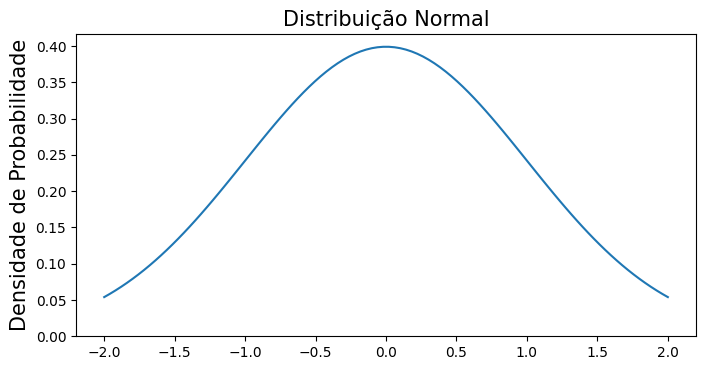

In [75]:
#Lembrete: Distribuição Normal - T de Student
x = np.linspace(-2, 2, num = 100) #variaçao de -2 e 2, com max 100 numeros - linspace return evenly spaced numbers over a specified interval
constant = 1.0 / np.sqrt(2*np.pi) #formula para a constante de uma distribuiçao normal
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0) #formula para distribuiçao normal
fig, ax = plt.subplots(figsize=(8, 4));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0); #inicia o grafico por essa numeraçao
ax.set_title('Distribuição Normal', size = 15);
ax.set_ylabel('Densidade de Probabilidade', size = 15);

$P(Y>5000)= P( Z > 1,71)$
o valor 1.71 deve ser procurado na tabela Z e subtrair de 1

$P(Y>5000)= 1- 𝚽(1,71)$

Se pode buscar da tabela com a numeraçao da probabilidade, ou utilizar a formula da celula abaixo para obter o valor na tabela T de Student

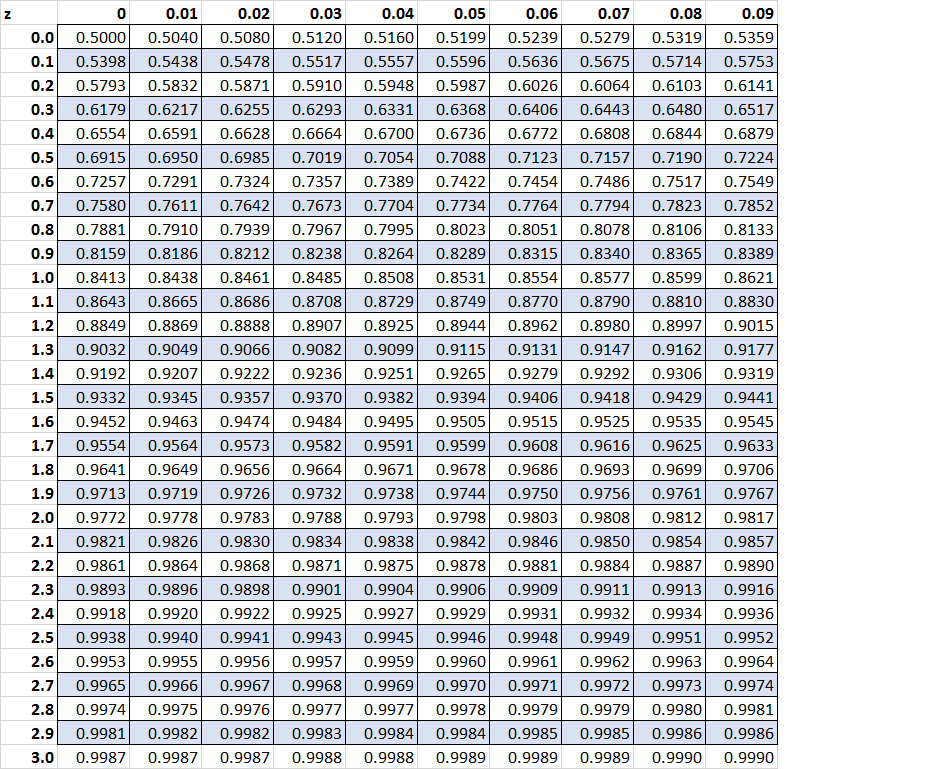

[link text](https://www.statology.org/z-table/)

In [76]:
#Código para determinar o T de Student de uma distribuiçao normal e obter o valor da tabela z
#importar librarias necessárias
from scipy.integrate import quad
#definir a equação considerando uma média de zero
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
#Obter o valor da tabela Z
PZa,_ = quad(normalProbabilityDensity, np.NINF, 1.71)
print('Phi(171)=', PZa)


Phi(171)= 0.9563670634759682


$P(Y>5000)= 1- 𝚽(1,71)$

Da tabela Z $𝚽(1,71) = 0,9564$

$P(Y>5000)= 1- 0.9564$ 

In [77]:
PYm=1-PZa
PYm

0.043632936524031773

$P(Y>5000)= 1- 0.9563 = 0,0436$

## Resposta b)
Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando tratamento acelerado for 2.500?

**Dados**
*   $\sigma = 350$ outra notação  $V= 350$
*   Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi --> $ Y = 1800 + 1,3x > 5000 $
*   quando o valor da resistência usando tratamento acelerado for 2.000? --> $x=2500$

O valor esperado de $Y$ para $x=2500$ usando $\mu_{Y:x^*}  = \beta_0 + \beta_1 x_i$ é 

$\mu_{Y:2500} = 1800 + 1,3(2000)$.

In [78]:
x=2500
uy= 1800 + 1.3*x
uy
print('O valor esperado de Y para x=2500 é =',uy)

O valor esperado de Y para x=2500 é = 5050.0


Considerando o desvio aleatório $\sigma = 350$, calcular $P(Y>5000)$ e considerando que o comportamento do desvio aleatório pode ser descrito mediante uma distribuição normal:

$P(Y>5000 \space quando \space x=2500)= P( Z > \frac{Y-u_{y,2500}}{V})$

$P(Y>5000)= P( Z > \frac{5000 - 5050}{350})$

In [79]:
y= 5000
uy= 5050
Si=350
valor= (y-uy)/Si
valor

-0.14285714285714285

Tabela distribução normal
https://www.statology.org/z-table/ 

Calculadora distribução normal
https://stattrek.com/online-calculator/normal.aspx

Considerar valor absoluto
$P(Y>5000)= P( Z > (0.143))$
o valor 0.143 deve ser procurado na tabela Z e subtrair de 1

$P(Y>5000)= 1- 𝚽(0.143)$


In [80]:
#importar librarias necessárias
from scipy.integrate import quad
#definir a equação considerando uma média de zero
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
#Obter o valor da tabela Z
PZb,_ = quad(normalProbabilityDensity, np.NINF, 0.143)
print('Phi(0.143)=', PZb)


Phi(0.143)= 0.5568549094034827


$P(Y>5000)= 1- 𝚽(0.143)$

Da tabela Z $𝚽(0.143) = 0,5568$

$P(Y>5000)= 1-0,5568$

In [81]:
PYm=1-PZb
PYm

0.4431450905965173

$P(Y>5000)= 1- 0.5568 = 0,443$

## Resposta c)
Considere fazer duas observações independentes sobre a resistência aos 28 dias, a primeira para uma resistência usando tratamento acelerado de 2.000 e a segunda para x = 2.500. Qual é a probabilidade de que a segunda observação exceda a primeira em mais de 1.000 psi?

**Dados**
*  A primeira observação ($Y_1$) para uma resistência usando tratamento acelerado de 2.000  --> $ \mu_{Y:2000}= Y_1 = 1800 + 1,3(2000)$ do item a) $ Y_1 = 4400$
*  A segunda observação ($Y_2$) para uma resistência usando tratamento acelerado de 2.500  --> $\mu_{Y:2500}= Y_2 = 1800 + 1,3(2500)$ do item b) $ Y_2 = 5050$
*  Pergunta: $P(Y_2 \space exceda  \space em  \space 1000  \space Y_1)$. formalmente $P(Y_2 - Y_1 > 1000)$. 
*  O desvio aleatório **$ɛ$** permanece em 350 para ambas observações
O valor esperado de $Y$ para $x=2000$ usando $\mu_{Y:x^*}  = \beta_0 + \beta_1 x_i$ é 


**Resposta**
Para o caso de duas amostras específicas o valor médio se calcula como segue:
$E(Y_2-Y_1)= β_1$

$E(Y_2-Y_1)= E(Y_2) - E(Y_1)= 5050 - 4400$

$E(Y_2-Y_1)= β_1 = 650$

Quando aos dados do descio aleatório:
$V(Y_2-Y_1)= V(Y_2) - V(Y_1) = \sigma^2 + \sigma^2$ 

$V(Y_2-Y_1)= V(Y_2) - V(Y_1) = (350)^2 + (350)^2$


In [82]:
Vy1y2= 350**2 + 350**2
Vy1y2

245000

$V(Y_2-Y_1)= V(Y_2) - V(Y_1) = 245000$

O valores obtido é a variança, portnato o desvio padrão será:

$\sqrt(\sigma^2)= \sqrt(245000)$

In [83]:
import math
V= math.pow(Vy1y2, 1/2)
V

494.9747468305833

Agora que temos os novos dados para o valor esperado $(E)=650$ e o desvio padrão $(\sigma)=V= 494,97$ e $Y_2 - Y_1 > 1000$
 
$P(Y_2 - Y_1 >1000)= P( Z > \frac{x-μ}{\sigma})$ ou

$P(Y_2 - Y_1 >1000)= P( Z > \frac{1000 - 650}{494,75})$



In [84]:
E=5050-4400
ZY1y2=(1000 - E)/V
ZY1y2

0.7071067811865475

$P(Y>5000)= P( Z > 0,71)$
Procurar na tabela Z

In [86]:
#importar librarias necessárias
from scipy.integrate import quad
#definir a equação considerando uma média de zero
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
#Obter o valor da tabela Z
PZc,_ = quad(normalProbabilityDensity, np.NINF, 0.7071) #deixei mais casas decimais
print('Phi(0.71)=', PZc)

Phi(0.71)= 0.7602478320101372


$P(Y2−Y1 > 1000)= 1- 𝚽(0.71)$

Da tabela Z $𝚽(0.71) = 0,761$

$P(Y2−Y1 > 1000)= 1-0,761$

In [87]:
PY12=1-PZc
PY12

0.23975216798986276

$P(Y2−Y1 > 1000)= 0,239$

## Resposta d)
Sejam Y1 e Y2 as observações sobre a resistência aos 28 dias quando x = x1 e x = x2, respectivamente. Em quanto x2 excederia x1 para que $P(Y2 > Y1) = 0,95$?

**Dados**
*   Pergunta: Se $P(Y2 > Y1) = 0,95$ quando vale $x_2 - x_1$ ?.
*   Do item anterior $\sigma=V(Y_2-Y1)= 494.97$.

**Resposta**
Lembrando que a reta de regresão simples é"
$Y= \beta_0 + \beta_1 x_i $

$Y= 1800 + 1,3 x_i $

Para o caso de duas amostras específicas o valor médio se descreve como segue:
$E(Y_2-Y_1)= E(Y_2) - E(Y_1)$

$E(Y_2-Y_1)= (1800 + 1,3 x_2) - (1800 + 1,3 x_1)$

$E(Y_2-Y_1)= 1800 + 1,3 x_2 - 1800 - 1,3 x_1$

$E(Y_2-Y_1)= 1,3 x_2 - 1,3 x_1$

$E(Y_2-Y_1)= 1,3 (x_2 - x_1) = μ $  (Eq1)

Por outra parte:

$P(Y_2 > Y_1)= 0,95$

$P(Y_2-Y_1 > 0 )= 0,95$

$P(Y_2 - Y_1 > 0)= P( Z > \frac{x-μ}{\sigma}) = 0,95 $ (Eq2)

Substituindo Eq1 em Eq2.

$P(Y_2 - Y_1 > 0)= P( Z > \frac{0-1,3 (x_2 - x_1)}{494,97}) = 0,95 $ (Eq3)

$P(Y_2 - Y_1 > 0)= P( Z > \frac{-1,3 (x_2 - x_1)}{494,97}) = 0,95 $ (Eq3)



In [88]:
a= -1.3/V
a


-0.002626396615835748

$P(Y_2 - Y_1 > 0) = 1 - 𝚽(-0.0263(x_2 - x_1))= 0,95$

$1 - 𝚽(-0.00263(x_2 - x_1))= 0,95$

O valor de 𝚽(-0.00263(x_2 - x_1) pode ser encontrado na tabela de Z

$𝚽(-0.00263(x_2 - x_1))= 0,95 - 1$

$𝚽(-0.00263(x_2 - x_1))= -0,05$

Portanto devemos procurar na tabela Z o valor que corresponde a -0,05 usado a tabela z negativa

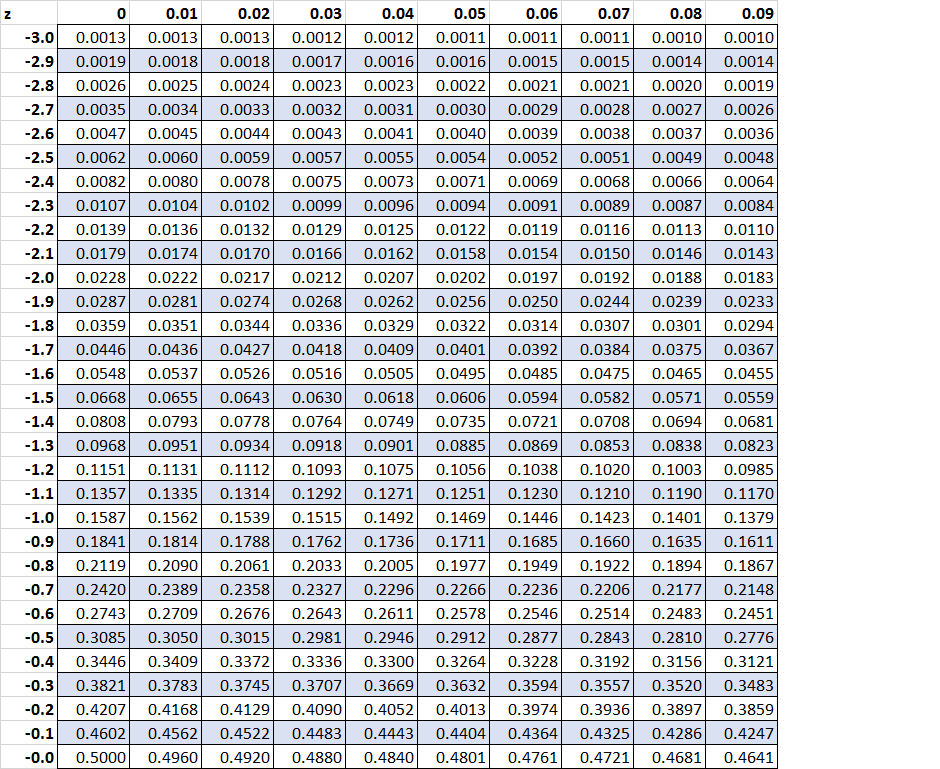

Da tabela
$𝚽(−0.00263(x_2−x_1))=−0,05$ 

$−0.00263(x_2−x_1) = -1,645$  


In [89]:
x2x1=-1.645/(-0.00263)
x2x1

625.4752851711027

Assim $(x2−x1) = 625.33$  
Portanto para $P(Y_2 > Y_1)= 0,95$ $x_2$ pode esceder $x_1$ em 625.33  
